In [13]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 5

In [14]:
# samplerate, data = wavfile.read('speaker3M_aC35_1.wav')
# print(data)

In [15]:
# plt.plot(data)
# plt.show()

In [16]:
for i, row in all_data.iterrows():
    if row.filename == "speaker3M_aC35_1":
        savedRow = row
        # break

In [17]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_58950/331929044.py:1: WavFileWarning: Reached EOF prematurely; finished at 24326 bytes, expected 48572 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


<function matplotlib.pyplot.show(close=None, block=None)>

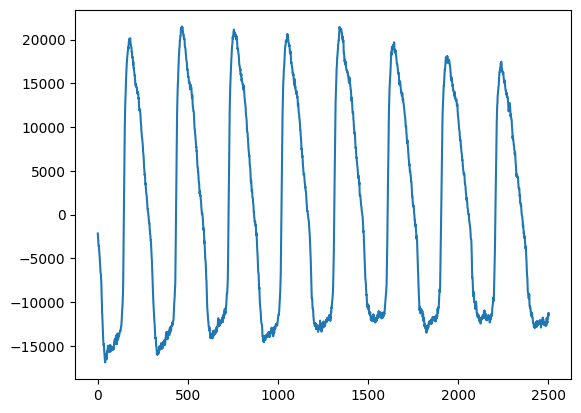

In [18]:
egg = data[startSample:endSample]
plt.plot(egg - np.mean(egg))
plt.show

In [19]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
peaks

array([ 180,  467,  755, 1051, 1341, 1644, 1938, 2238, 2498])

<function matplotlib.pyplot.show(close=None, block=None)>

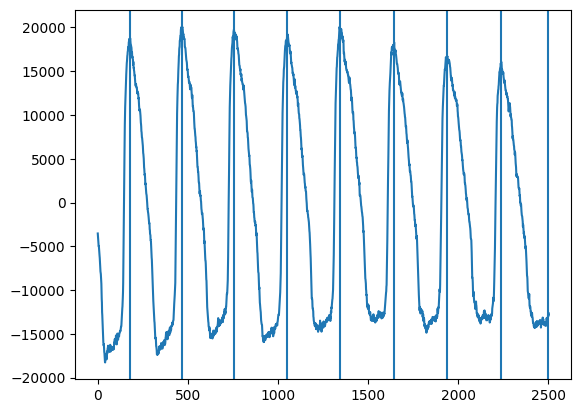

In [20]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.show

In [21]:
# between the second and third peak, find the min and max:

# singleton = egg[peaks[1]:peaks[2]]
# maxx = float(np.max(singleton))
# minn = float(np.min(singleton))

threshold = find_threshold(egg, peaks)

In [22]:
# rounded_off = egg[peaks[0]:]
# above_thresh = set(np.argwhere(rounded_off >= threshold).flatten())

# crosses = []
# for i in range(1, len(rounded_off)):
#     if (i - 1 in above_thresh) != (i in above_thresh):
#         crosses.append(i)

# crosses

# plt.plot(rounded_off)
# for cross in crosses:
#     plt.axvline(cross)
# plt.axhline(threshold)
# plt.show

In [23]:
# clipped_egg = rounded_off[crosses[0]:crosses[4]]

<function matplotlib.pyplot.show(close=None, block=None)>

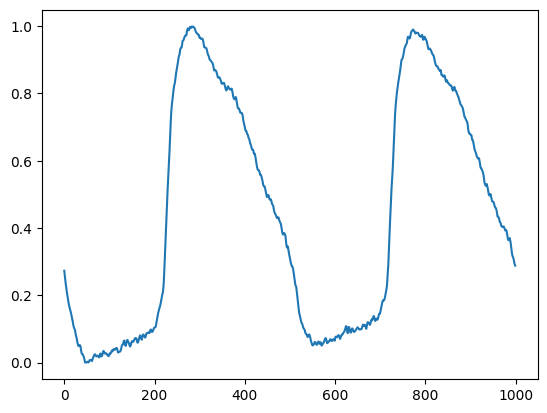

In [24]:
clipped_egg = clip_egg(egg, threshold, peaks[0])
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show